<a href="https://colab.research.google.com/github/HarikrishnanK9/DataSymphony/blob/main/JobelSirResearchData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("/content/Jobel_Sir.csv")
df

,Temp (°C),Press (bar),Density (kg/m3),Enthalpy (kJ/kg),Cp (kJ/kg_K),Phase
0,12.004,74,883.27,225.92,2.6128,Gas
1,12.005,74,883.26,225.92,2.6129,Gas
2,12.006,74,883.26,225.92,2.6129,Gas
3,12.007,74,883.25,225.93,2.6130,Gas
4,12.008,74,883.24,225.93,2.6130,Gas
...,...,...,...,...,...,...
77992,89.996,74,135.53,511.27,1.3443,Supercritical
77993,89.997,74,135.53,511.27,1.3443,Supercritical
77994,89.998,74,135.53,511.27,1.3442,Supercritical
77995,89.999,74,135.53,511.27,1.3442,Supercritical


In [3]:
df.head()

,Temp (°C),Press (bar),Density (kg/m3),Enthalpy (kJ/kg),Cp (kJ/kg_K),Phase
0,12.004,74,883.27,225.92,2.6128,Gas
1,12.005,74,883.26,225.92,2.6129,Gas
2,12.006,74,883.26,225.92,2.6129,Gas
3,12.007,74,883.25,225.93,2.6130,Gas
4,12.008,74,883.24,225.93,2.6130,Gas


In [4]:
df.tail()

,Temp (°C),Press (bar),Density (kg/m3),Enthalpy (kJ/kg),Cp (kJ/kg_K),Phase
77992,89.996,74,135.53,511.27,1.3443,Supercritical
77993,89.997,74,135.53,511.27,1.3443,Supercritical
77994,89.998,74,135.53,511.27,1.3442,Supercritical
77995,89.999,74,135.53,511.27,1.3442,Supercritical
77996,90.000,74,135.53,511.27,1.3442,Supercritical


In [5]:
df.dtypes

Temp (°C)           float64
Press (bar)           int64
Density (kg/m3)     float64
Enthalpy (kJ/kg)    float64
Cp (kJ/kg_K)        float64
Phase                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77997 entries, 0 to 77996
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp (°C)         77997 non-null  float64
 1   Press (bar)       77997 non-null  int64  
 2   Density (kg/m3)   77997 non-null  float64
 3   Enthalpy (kJ/kg)  77997 non-null  float64
 4   Cp (kJ/kg_K)      77997 non-null  float64
 5   Phase             77997 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ MB


In [7]:
df.columns

Index(['Temp (°C)', 'Press (bar)', 'Density (kg/m3)', 'Enthalpy (kJ/kg)',
       'Cp (kJ/kg_K)', 'Phase'],
      dtype='object')

In [8]:
df.isna().sum()

Temp (°C)           0
Press (bar)         0
Density (kg/m3)     0
Enthalpy (kJ/kg)    0
Cp (kJ/kg_K)        0
Phase               0
dtype: int64

In [9]:
df.duplicated().sum()

0

<Axes: >

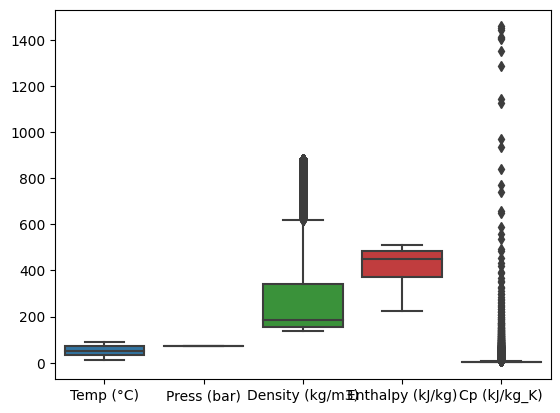

In [10]:
sns.boxplot(df)

In [11]:
df.columns

Index(['Temp (°C)', 'Press (bar)', 'Density (kg/m3)', 'Enthalpy (kJ/kg)',
       'Cp (kJ/kg_K)', 'Phase'],
      dtype='object')

<Axes: xlabel='Phase', ylabel='count'>

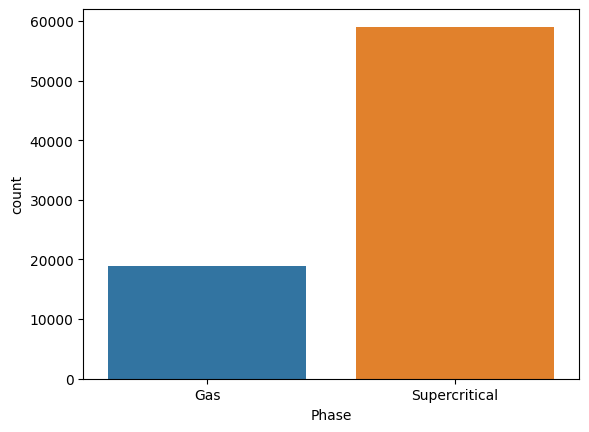

In [12]:
sns.countplot(x="Phase",data=df)

**Checking what is the maximum temperature where gaseous state obtained**

In [62]:
a=df.loc[df["Phase"]=="Gas"].sort_values(by="Temp (°C)",ascending=False).max() ["Temp (°C)"]
a

30.978

**Displaying all attributes where maximum temperature state for Gaseous State obtained**

In [69]:
A=df.loc[df["Phase"]=="Gas"].sort_values(by="Temp (°C)",ascending=False).max() [df.columns]
A

Temp (°C)           30.978
Press (bar)             74
Density (kg/m3)     883.27
Enthalpy (kJ/kg)    310.65
Cp (kJ/kg_K)        41.334
Phase                  Gas
dtype: object

**Checking at which temperature point the result was Supercritical state**

In [70]:
b=df.loc[df["Phase"]=="Supercritical"].sort_values(by="Temp (°C)").min() ["Temp (°C)"]
b

30.979

**Displaying all attributes where supercritical state begins**

In [71]:
B=df.loc[df["Phase"]=="Supercritical"].sort_values(by="Temp (°C)").min() [df.columns]
B

Temp (°C)                  30.979
Press (bar)                    74
Density (kg/m3)            135.53
Enthalpy (kJ/kg)            310.7
Cp (kJ/kg_K)               1.3442
Phase               Supercritical
dtype: object

**Maximum temperature range of Supercritical State**

In [64]:
c=df.loc[df["Phase"]=="Supercritical"].sort_values(by="Temp (°C)").max() ["Temp (°C)"]
c

90.0

**Displaying all attributes where temperature was maximum of supercritical state**

In [75]:
C=df.loc[df["Phase"]=="Supercritical"].sort_values(by="Temp (°C)").max() [df.columns]
C

Temp (°C)                    90.0
Press (bar)                    74
Density (kg/m3)             570.5
Enthalpy (kJ/kg)           511.27
Cp (kJ/kg_K)               1458.1
Phase               Supercritical
dtype: object

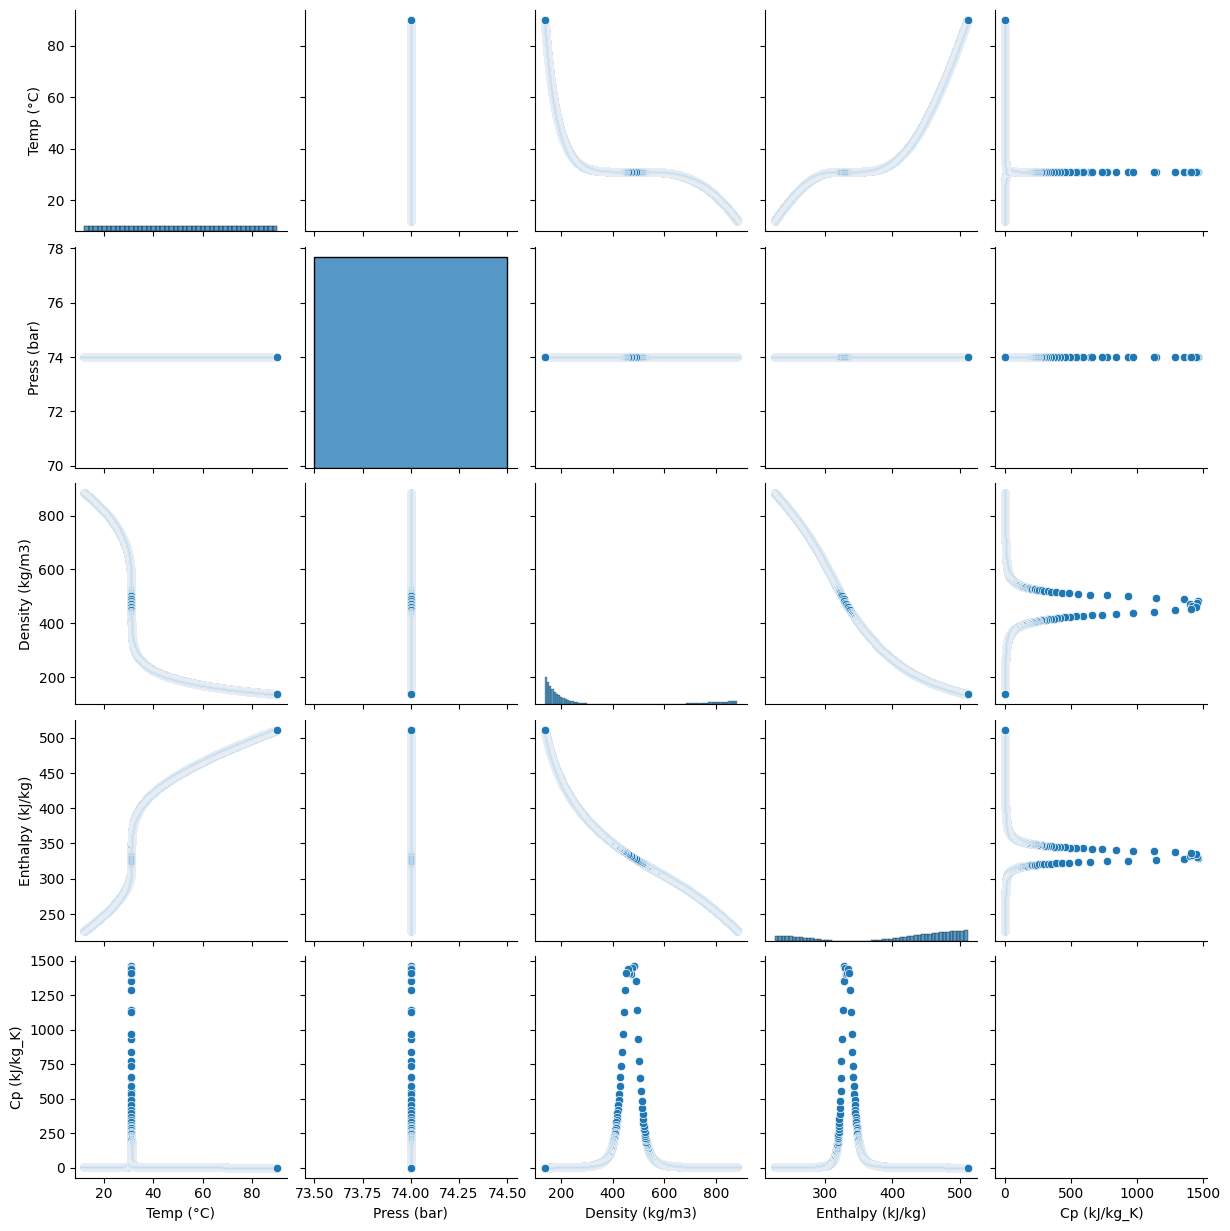

In [13]:
sns.pairplot(df)

In [14]:
df.columns

Index(['Temp (°C)', 'Press (bar)', 'Density (kg/m3)', 'Enthalpy (kJ/kg)',
       'Cp (kJ/kg_K)', 'Phase'],
      dtype='object')

<Axes: xlabel='Temp (°C)', ylabel='Enthalpy (kJ/kg)'>

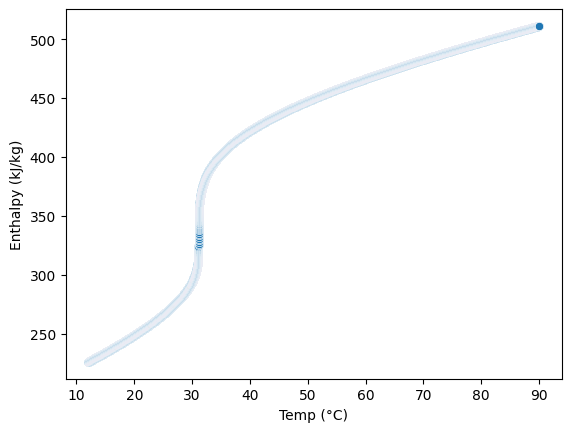

In [15]:
sns.scatterplot(x='Temp (°C)',y='Enthalpy (kJ/kg)',data=df)

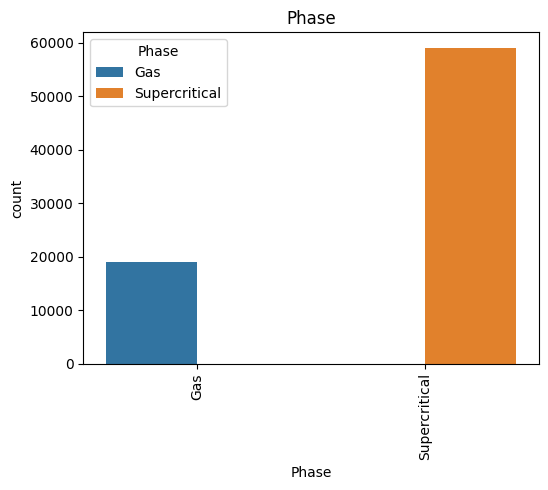

In [16]:
cat_vars=df.select_dtypes(include='object').columns.tolist()
num_columns=len(cat_vars)
num_rows=(num_columns+2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()
for i,var in enumerate(cat_vars):
  sns.countplot(x=var,data=df,hue='Phase',ax=axs[i])
  axs[i].set_title(var)
  axs[i].tick_params(axis='x',rotation=90)
if num_columns<len(axs):
  for i in range(num_columns,len(axs)):
    fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

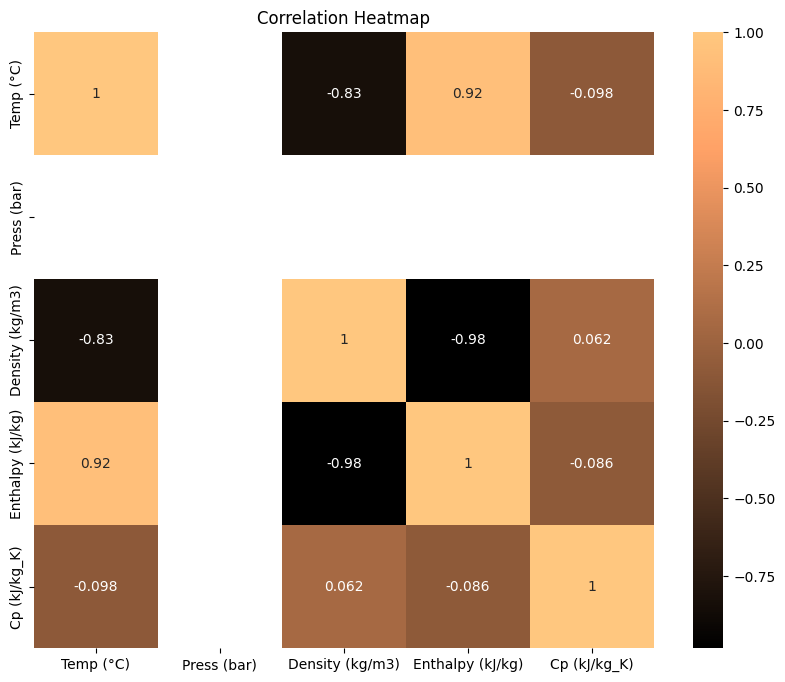

In [17]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='copper')
plt.title('Correlation Heatmap')
plt.show()

**Observation:**Enthalpy and Temperature shows stronng positive cor relation

In [18]:
X=df.iloc[:,:-1].values
X

array([[ 12.004 ,  74.    , 883.27  , 225.92  ,   2.6128],
       [ 12.005 ,  74.    , 883.26  , 225.92  ,   2.6129],
       [ 12.006 ,  74.    , 883.26  , 225.92  ,   2.6129],
       ...,
       [ 89.998 ,  74.    , 135.53  , 511.27  ,   1.3442],
       [ 89.999 ,  74.    , 135.53  , 511.27  ,   1.3442],
       [ 90.    ,  74.    , 135.53  , 511.27  ,   1.3442]])

In [19]:
y=df.iloc[:,-1].values
y

array(['Gas', 'Gas', 'Gas', ..., 'Supercritical', 'Supercritical',
       'Supercritical'], dtype=object)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape

((54597, 5), (23400, 5))

In [21]:
y_train.shape,y_test.shape

((54597,), (23400,))

<Axes: >

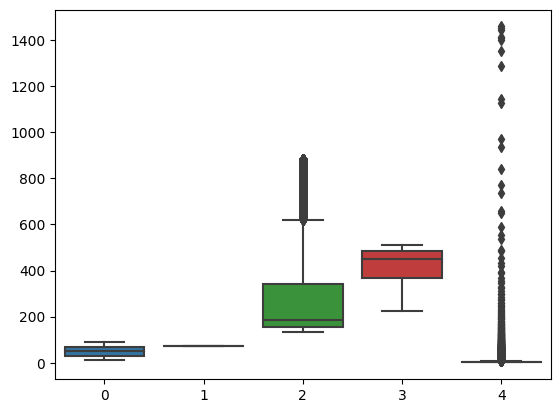

In [22]:
sns.boxplot(X)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


**Model1:DecisionTree**

In [24]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion="entropy")
dec.fit(X_train,y_train)
y_pred=dec.predict(X_test)
y_pred

array(['Supercritical', 'Gas', 'Gas', ..., 'Gas', 'Supercritical',
       'Supercritical'], dtype=object)

[Text(0.5, 0.75, 'Enthalpy (kJ/kg) <= -1.072\nentropy = 0.803\nsamples = 54597\nvalue = [13363, 41234]\nclass = Supercritical'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 13363\nvalue = [13363, 0]\nclass = Gas'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 41234\nvalue = [0, 41234]\nclass = Supercritical')]

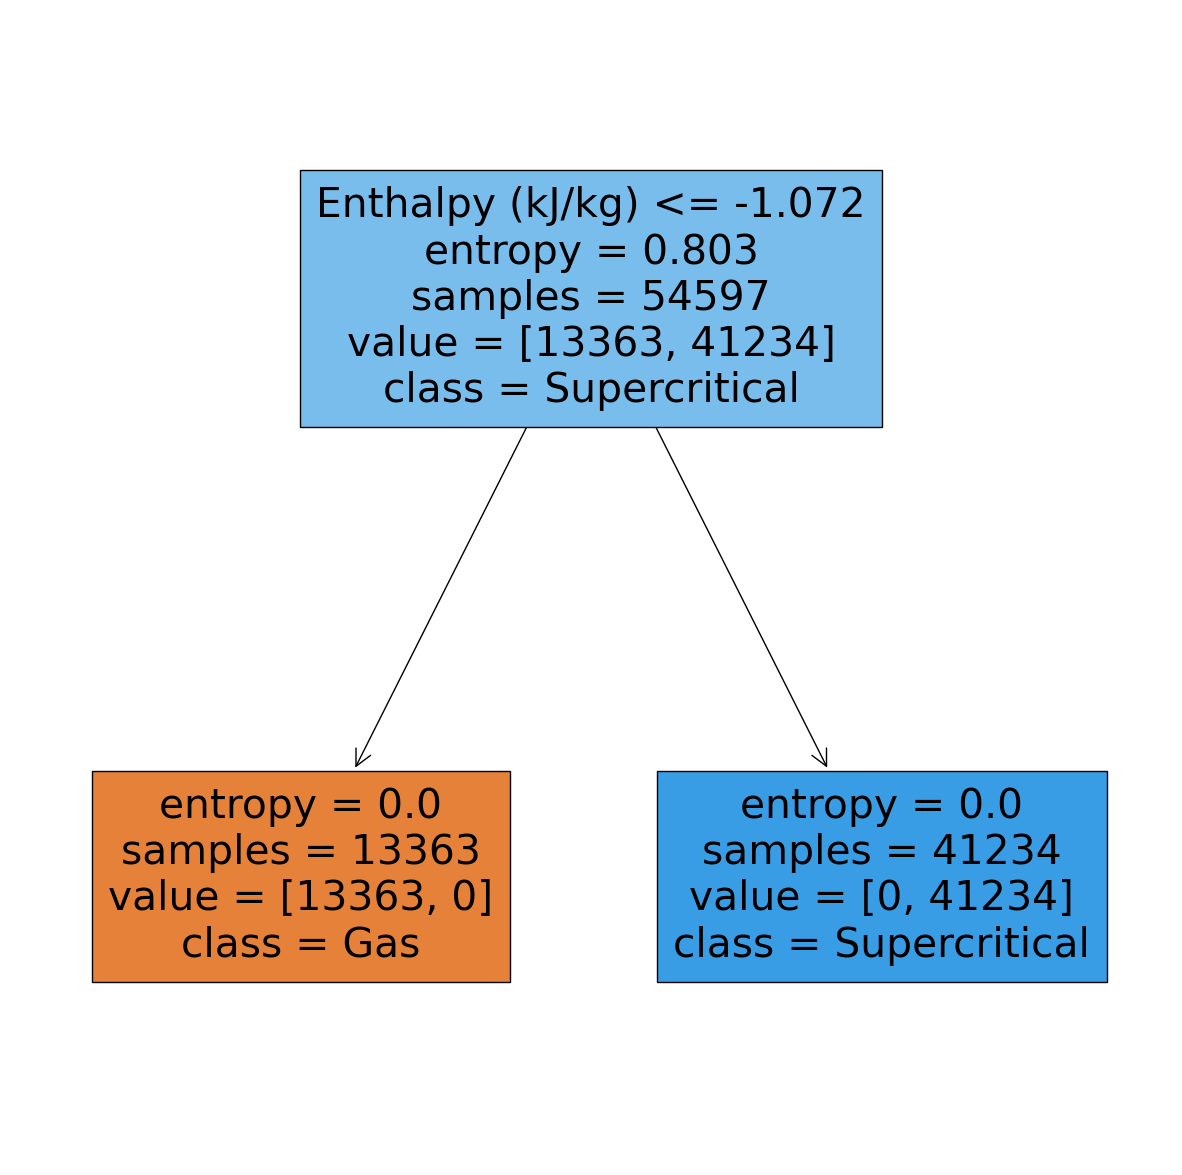

In [25]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dec,feature_names=['Temp (°C)', 'Press (bar)', 'Density (kg/m3)', 'Enthalpy (kJ/kg)','Cp (kJ/kg_K)'],class_names=['Gas', 'Supercritical'],filled=True)

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred))

1.0


In [27]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

          Gas       1.00      1.00      1.00      5612
Supercritical       1.00      1.00      1.00     17788

     accuracy                           1.00     23400
    macro avg       1.00      1.00      1.00     23400
 weighted avg       1.00      1.00      1.00     23400



**Observation:**

1. Gas Class:

 * Precision: 1.00 (perfect precision)
 * Recall: 1.00 (perfect recall)
 * F1-score: 1.00 (perfect balance between precision and recall)
 * Support: 5612 (number of instances of the "Gas" class)
2. Supercritical Class:

 * Precision: 1.00 (perfect precision)
 * Recall: 1.00 (perfect recall)
 * F1-score: 1.00 (perfect balance between precision and recall)
 * Support: 17788 (number of instances of the "Supercritical" class)
3. Overall:

 * Accuracy: 1.00 (perfect accuracy)
 * Macro average: 1.00 (average of precision, recall, and F1-score across classes, with equal weights)
 * Weighted average: 1.00 (weighted average of precision, recall, and F1-score, where the weights are based on the support of each class)



[[ 5612     0]
 [    0 17788]]


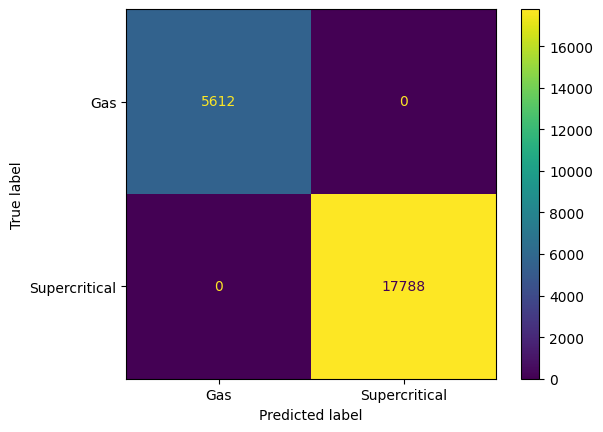

In [28]:
result=confusion_matrix(y_test,y_pred)
print(result)
labels=['Gas', 'Supercritical']
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

**Model2:RandomForest**

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred2=rfc.predict(X_test)
y_pred2

array(['Supercritical', 'Gas', 'Gas', ..., 'Gas', 'Supercritical',
       'Supercritical'], dtype=object)

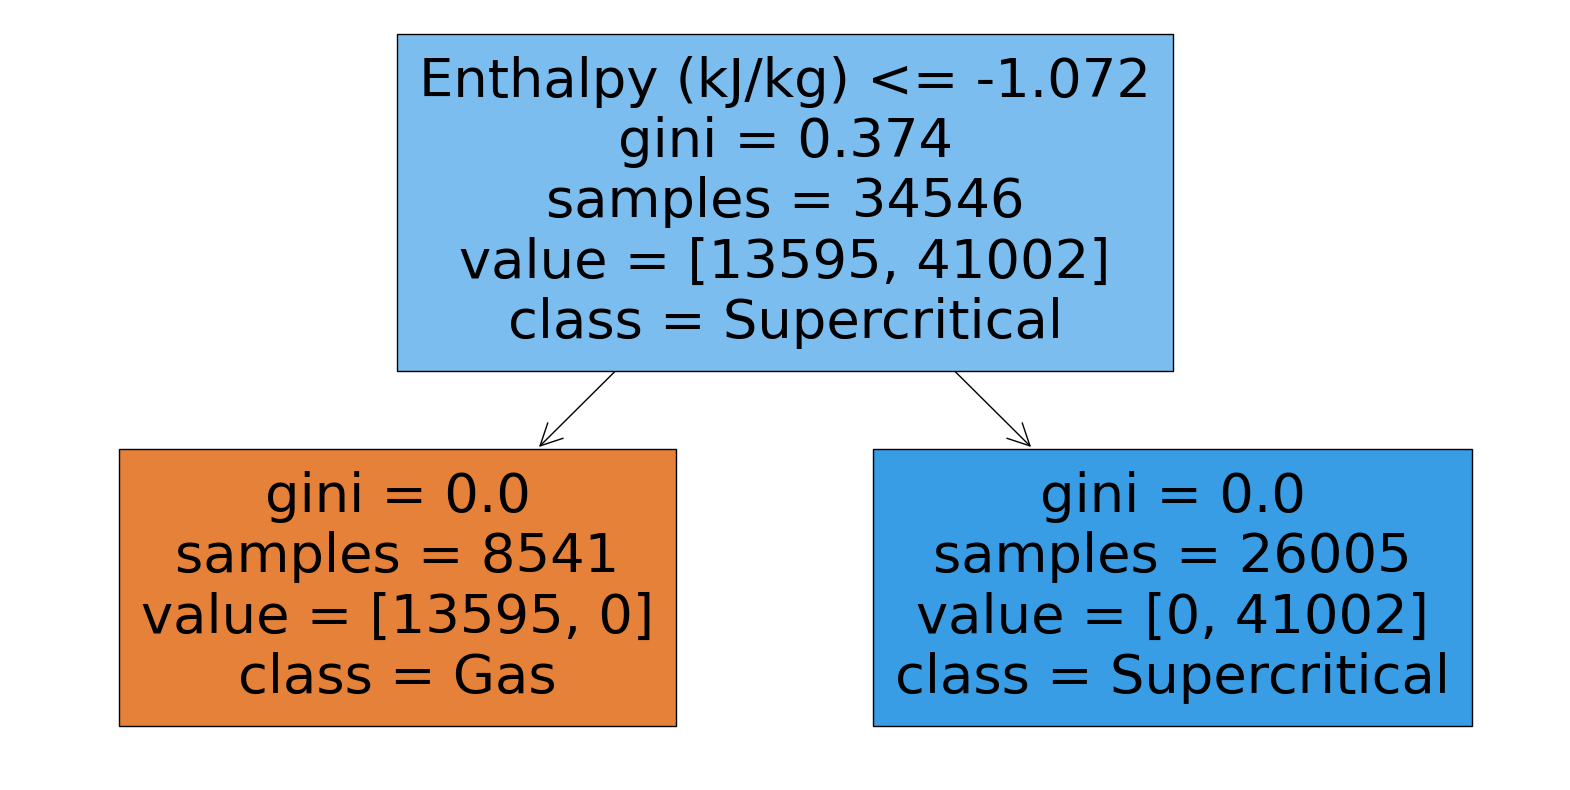

In [30]:
plt.figure(figsize=(20, 10))
for i in range(len(rfc.estimators_)):
    tree.plot_tree(rfc.estimators_[i], filled=True,feature_names=['Temp (°C)', 'Press (bar)', 'Density (kg/m3)', 'Enthalpy (kJ/kg)','Cp (kJ/kg_K)'],class_names=['Gas', 'Supercritical'])
plt.show()

In [31]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy Score is :",accuracy_score(y_test,y_pred2))
print("Classification Report:")
print(classification_report(y_test,y_pred2))

Accuracy Score is : 1.0
Classification Report:
               precision    recall  f1-score   support

          Gas       1.00      1.00      1.00      5612
Supercritical       1.00      1.00      1.00     17788

     accuracy                           1.00     23400
    macro avg       1.00      1.00      1.00     23400
 weighted avg       1.00      1.00      1.00     23400



[[ 5612     0]
 [    0 17788]]


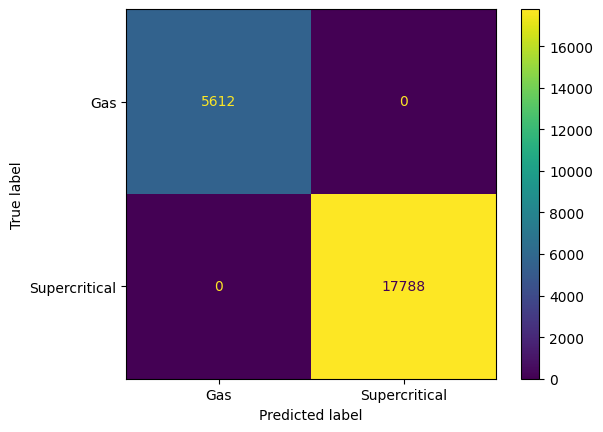

In [34]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred2)
print(result)
labels=['Gas', 'Supercritical']
cmd1=ConfusionMatrixDisplay(result,display_labels=labels)
cmd1.plot()

**Observations:**

1.  Gas Class:

 * Precision: 1.00 (perfect precision)
 * Recall: 1.00 (perfect recall)
 * F1-score: 1.00 (perfect balance between precision and recall)
 * Support: 5612 (number of instances of the "Gas" class)
2. Supercritical Class:

 * Precision: 1.00 (perfect precision)
 * Recall: 1.00 (perfect recall)
 * F1-score: 1.00 (perfect balance between precision and recall)
 * Support: 17788 (number of instances of the "Supercritical" class)
3. Overall:

 * Accuracy: 1.00 (perfect accuracy)
 * Macro average: 1.00 (average of precision, recall, and F1-score across classes, with equal weights)
 * Weighted average: 1.00 (weighted average of precision, recall, and F1-score, where the weights are based on the support of each class)






**CONCLUSION**

These results indicate that  model is performing exceptionally well on this dataset. It has achieved perfect precision, recall, and F1-score for both classes, as well as perfect overall accuracy. This suggests that the model is correctly classifying instances from both classes with high confidence.